In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

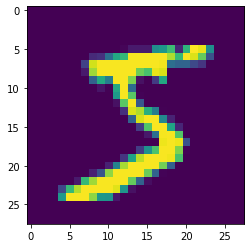

In [5]:
# Visualize the first training image
plt.imshow(X_train[0])

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train.max()

255

In [12]:
X_train.min()

0

In [15]:
y_train[0]

5

In [13]:
# Scaling the train set
X_train = X_train/255

In [14]:
# Scaling the test set
X_test = X_test/255

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [24]:
# Enocder
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [25]:
# Decoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [26]:
autoencoder = Sequential([encoder,decoder])

In [27]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [29]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2429 - accuracy: 0.0984 - val_loss: 0.1974 - val_accuracy: 0.1412
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1777 - accuracy: 0.1710 - val_loss: 0.1611 - val_accuracy: 0.1953
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1554 - accuracy: 0.2016 - val_loss: 0.1484 - val_accuracy: 0.2092
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1459 - accuracy: 0.2164 - val_loss: 0.1425 - val_accuracy: 0.2146
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1398 - accuracy: 0.2234 - val_loss: 0.1383 - val_accuracy: 0.2175


In [30]:
passed_images = autoencoder.predict(X_test[:10])

In [35]:
passed_images.shape

(10, 28, 28)

Original Image


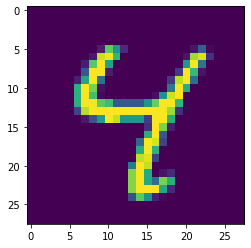

After Autoencoded Image


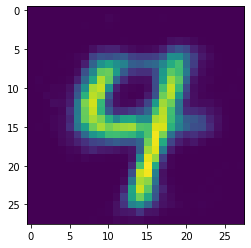

In [38]:
n = 6

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('After Autoencoded Image')
plt.imshow(passed_images[n])
plt.show()